#### 6. Develop a program to forecast future values in time series data, such as weather patterns, using RNN models like LSTM or GRU.
(Using Synthetic data)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
data = np.sin(np.arange(100) * 0.1)
data.shape

(100,)

In [4]:
X, y = [], []
for i in range(len(data) - 10):
    X.append(data[i:i+10])
    y.append(data[i+10])

In [5]:
X, y = np.array(X), np.array(y)
X = X.reshape(-1, 10, 1)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10, 1)),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dense(1)
])

In [7]:
model.compile(optimizer='adam', loss='mse')

In [8]:
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 6ms/step - loss: 0.4648
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4124
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 0.3590
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.3142
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2756
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2407
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 0.2106
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.1876
Epoch 9/10
3/3 [==============================] - 0s 6ms/step - loss: 0.1692
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 0.1547


In [9]:
preds = []
seq = X[-1]

In [10]:
for _ in range(10):
    pred = model.predict(seq.reshape(1, 10, 1), verbose=0)[0, 0]
    preds.append(pred)
    seq = np.roll(seq, -1) # shift sequence
    seq[-1] = pred # append predicted value

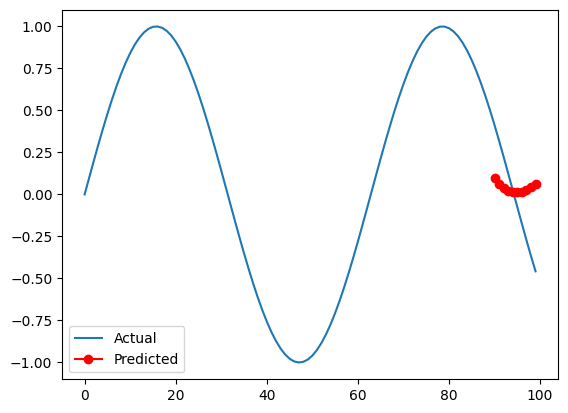

In [11]:
plt.plot(data, label='Actual')
plt.plot(range(90, 100), preds, 'ro-', label='Predicted')
plt.legend()
plt.show()